## Predictive model using K-Nearest Neighbor Classifier (KNN)

K-Nearest Neighbors (KNN) is a simple and interpretable algorithm for classification and regression tasks. It makes predictions based on the similarity of data points. Unlike SVMs, KNN is non-parametric, meaning it doesn't make assumptions about the underlying data distribution.

KNN excels in its ease of use and clear intuition.  However, it has limitations. 
1. KNN requires storing the entire training dataset for prediction, which can be memory-intensive for large datasets. 
2. Choosing the optimal value of <code>K</code> (the number of neighbors) is crucial for performance and can be a challenge. 
3. KNN can also be sensitive to noisy data and suffer from the curse of dimensionality in high-dimensional settings.

### Important Parameters
The important parameters in KNN are the
* Number of Neighbors, <code>n_neighbors</code>, 
* The choice of the weight, (<code>uniform</code>or <code>distance</code>)
* The metric, <code>minkowski</code>, <code>manhattan</code> or <code>euclidean</code>. 

<code>n_neighbors</code>, <code>metric</code> and <code>weight</code> both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the three parameters are usually strongly correlated, and all three should be adjusted together.

#### Load the libraries and data

In [ ]:
import pandas as pd
import numpy as np

## Data split
from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns 
plt.rcParams['figure.figsize'] = (8,4)

## Supervised learning with model evaluation and optimization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv('data/cleaned_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cols = df.columns[df.columns != 'diagnosis']

# assigning feature dataframe
X = df.iloc[:, 1:]

#assigning target variable
y = df.iloc[:,0]

#X.head()

In [4]:
df_scaled = pd.read_csv('data/preprocessed_data.csv')
df_scaled.drop(['Unnamed: 0'], axis=1, inplace=True)
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [5]:
# assigning feature dataframe
X_scaled = df_scaled.iloc[:, 0:30]

#assigning target variable
y = df_scaled.iloc[:,-1]

In [6]:
#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2, stratify=y)

In [7]:
X_pca = np.load('data/pca_data.npy')
#X_pca

### Classification with KNN using cross-validation

As discussed in this notebook, splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we specify **so-called folds** so that the data is divided into similarly-sized folds. 

* Training occurs by taking all folds except one – referred to as the holdout sample. 
* On the completion of the training, you test the performance of your fitted model using the holdout sample. 

* The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample. 

* Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample. 

* The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample. 

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [10]:
#Create an SVM classifier and train it on 80% of the data set.
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)

#Analyze accuracy of predictions on 20% of the holdout test sample.
classifier_score1 = clf1.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score1))


The classifier accuracy score is 0.96



The classifier accuracy score for 1 neighbors is 0.95614035
The classifier accuracy score for 2 neighbors is 0.94736842
The classifier accuracy score for 3 neighbors is 0.94736842
The classifier accuracy score for 4 neighbors is 0.94736842
The classifier accuracy score for 5 neighbors is 0.95614035
The classifier accuracy score for 6 neighbors is 0.95614035
The classifier accuracy score for 7 neighbors is 0.95614035
The classifier accuracy score for 8 neighbors is 0.94736842
The classifier accuracy score for 9 neighbors is 0.94736842
The classifier accuracy score for 10 neighbors is 0.94736842
----------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

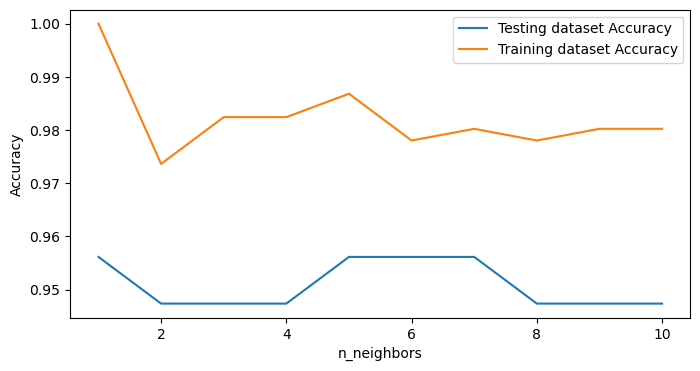

In [24]:
k_values = np.arange(1, 11)
train_accuracy = np.empty(len(k_values)) 
test_accuracy = np.empty(len(k_values)) 
  
for i, k in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    clf_score = clf.score(X_test, y_test)
    print('The classifier accuracy score for {} neighbors is {:0.8f}'.format(k, clf_score))
    
    # Compute training and test data accuracy 
    train_accuracy[i] = clf.score(X_train, y_train) 
    test_accuracy[i] = clf_score
    
print('-'*100)
    
# Generate plot 
plt.plot(k_values, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(k_values, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

#### Observation
>As is clear from the plot above for a simple KNN classifier the training accuracy peaks at <code>k=5,6,7</code> but simultaneously the testing accuracy is the highest at <code>k=5,7</code>. So I will be mostly using <code>n_neighbors=5,6,7</code> for subsequent optimizations.

In [27]:
clf = KNeighborsClassifier(n_neighbors=5)
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds1 = 3
cv_error = np.average(cross_val_score(clf, X_scaled, y, cv=n_folds1))
print ('The {}-fold cross-validation accuracy score is {:.8f}'.format(n_folds1, cv_error))

# Get average of 5-fold cross-validation score using an SVC estimator.
n_folds2 = 5
cv_error = np.average(cross_val_score(clf, X_scaled, y, cv=n_folds2))
print ('The {}-fold cross-validation accuracy score is {:.8f}'.format(n_folds2, cv_error))

The 3-fold cross-validation accuracy score is 0.96132925
The 5-fold cross-validation accuracy score is 0.96485018


In [28]:
#use pipelines
clf2 = make_pipeline(SelectKBest(f_regression, k=3), KNeighborsClassifier(n_neighbors=5))

scores_3fold = cross_val_score(clf2, X_scaled, y, cv=3)
scores_5fold = cross_val_score(clf2, X_scaled, y, cv=5)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds1 = 3
cv_error = np.average(cross_val_score(clf2, X_scaled, y, cv=n_folds1))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds1, cv_error))

avg_3fold = (100*np.mean(scores_3fold), 100*np.std(scores_3fold)/np.sqrt(scores_3fold.shape[0]))
print("Average score and uncertainty for {}-fold cross validation: ".format(n_folds1))
print("(%.2f +- %.3f)%%"%avg_3fold)

print('-'*100)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds2 = 5
cv_error = np.average(cross_val_score(clf2, X_scaled, y, cv=n_folds2))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds2, cv_error))

avg_5fold = (100*np.mean(scores_5fold), 100*np.std(scores_5fold)/np.sqrt(scores_5fold.shape[0]))
print("Average score and uncertainty for {}-fold cross validation: ".format(n_folds2))
print("(%.2f +- %.3f)%%"%avg_5fold)

The 3-fold cross-validation accuracy score for this classifier is 0.93
Average score and uncertainty for 3-fold cross validation: 
(93.32 +- 0.712)%
----------------------------------------------------------------------------------------------------
The 5-fold cross-validation accuracy score for this classifier is 0.94
Average score and uncertainty for 5-fold cross validation: 
(93.67 +- 0.625)%


Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

----------------------------------------------------------------------------------------------------
Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

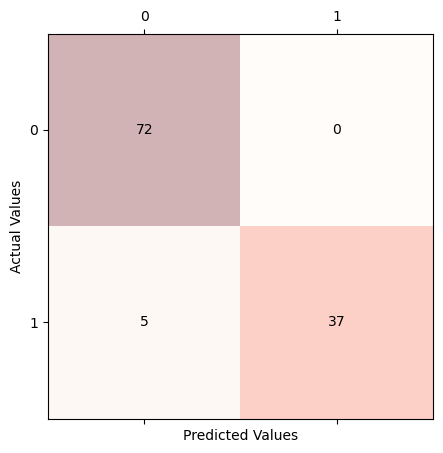

In [29]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf1.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Classification Report')
print(classification_report(y_test, y_pred))

print('-'*100)

print('Confusion Matrix')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Receiver operating characteristic example')

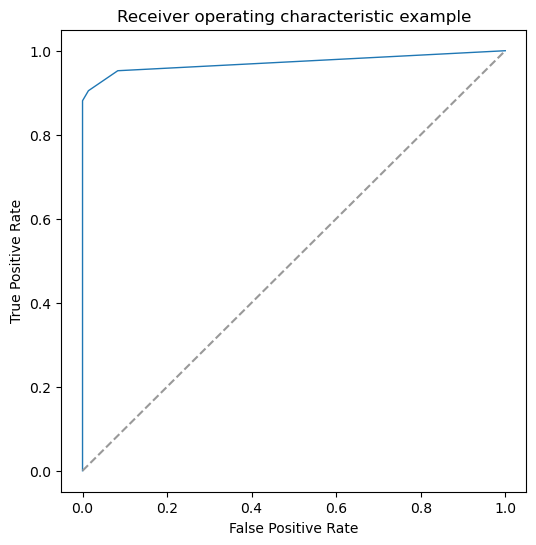

In [30]:
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(6, 6))
probas_ = clf1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
#plt.axes().set_aspect(1)

#### Model Accuracy: Receiver Operating Characteristic (ROC) curve

In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy for binary classification problems is Area Under the Curve (AUC).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted).

Model says "+" |Model says  "-" <br>
--- | --- | --- <br>
`True positive` | `False negative` | Actual: "+" <br>
 `False positive`  | `True negative` |  Actual: "-" <br>
 --- | --- | --- <br>
 In an ROC curve, you plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:
> * True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
> * False positive rate:       fpr = fp / (fp + tn)
> * True negative rate (or specificity): tnr = tn / (fp + tn)

In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can  express
* the true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").          

#### Interpreting the ROC Curve
* To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

* For the points above the diagonal, tpr > fpr, and the model says that you are in a zone where you are performing better than random. For example, here tpr = 0.93 and fpr = 0.01, Then, the probability of being in the true positive group is $(0.93 / (0.93 + 0.01)) = 99\%$. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification mode.

### Optimizing the KNN Classifier

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this notebook, I aim to tune parameters of the KNN Classification model using scikit-learn. 

The classifier accuracy score for k_value 1 is 0.96491228
The classifier accuracy score for k_value 2 is 0.94736842
The classifier accuracy score for k_value 3 is 0.96491228
The classifier accuracy score for k_value 4 is 0.94736842
The classifier accuracy score for k_value 5 is 0.95614035
The classifier accuracy score for k_value 6 is 0.95614035
The classifier accuracy score for k_value 7 is 0.95614035
The classifier accuracy score for k_value 8 is 0.94736842
The classifier accuracy score for k_value 9 is 0.94736842
The classifier accuracy score for k_value 10 is 0.94736842
----------------------------------------------------------------------------------------------------
The 3-fold cross-validation accuracy score for k_value 3 is 0.96308364
The 5-fold cross-validation accuracy score for k_value 3 is 0.96129483
The 3-fold cross-validation accuracy score for k_value 5 is 0.96484730
The 5-fold cross-validation accuracy score for k_value 5 is 0.96131036
The 3-fold cross-validation accura

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

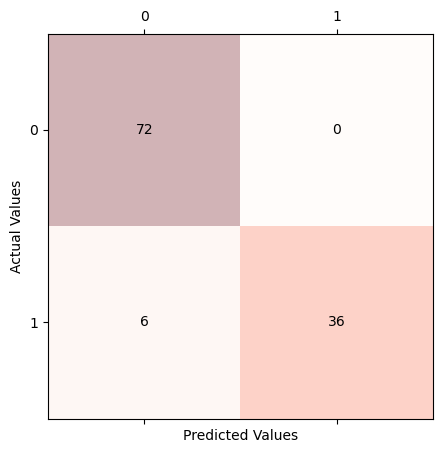

In [48]:
#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2, stratify=y)

for i, k in enumerate(np.arange(1, 11)):
    #Create an SVM classifier and train it on 80% of the data set.
    clf3 = KNeighborsClassifier(n_neighbors=k)
    clf3.fit(X_train, y_train)

    #Analyze accuracy of predictions on 20% of the holdout test sample.
    classifier_score3 = clf3.score(X_test, y_test)
    print ('The classifier accuracy score for k_value {} is {:0.8f}'.format(k, classifier_score3))

print('-'*100)

for i, k in enumerate([3, 5, 6, 7]):
    # Get average of 3-fold cross-validation score using an SVC estimator.
    n_folds = 3
    cv_error = np.average(cross_val_score(KNeighborsClassifier(n_neighbors=k), X_pca, y, cv=n_folds))
    print ('The {}-fold cross-validation accuracy score for k_value {} is {:.8f}'.format(n_folds, k, cv_error))

    # Get average of 5-fold cross-validation score using an SVC estimator.
    n_folds = 5
    cv_error = np.average(cross_val_score(KNeighborsClassifier(n_neighbors=k), X_pca, y, cv=n_folds))
    print ('The {}-fold cross-validation accuracy score for k_value {} is {:.8f}'.format(n_folds, k, cv_error))

print('-'*100)
y_pred = clf3.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Classification Report')
print(classification_report(y_test, y_pred ))

print('-'*100)

print('Confusion Matrix')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [66]:
for i, k in enumerate(np.arange(1, 11)):
    clf4 = make_pipeline(SelectKBest(f_regression, k=10),KNeighborsClassifier(n_neighbors=k))
    #clf4.fit(X_train, y_train)

    # Get average of 3-fold cross-validation score using an SVC estimator.
    n_folds = 3
    cv_error = np.average(cross_val_score(clf4, X_pca, y, cv=n_folds))
    print ('The {}-fold cross-validation accuracy score for k_value {} is {:.8f}'.format(n_folds, k, cv_error))

    # Get average of 5-fold cross-validation score using an SVC estimator.
    n_folds = 5
    cv_error = np.average(cross_val_score(clf4, X_pca, y, cv=n_folds))
    print ('The {}-fold cross-validation accuracy score for k_value {} is {:.8f}'.format(n_folds, k, cv_error))

    y_pred = clf4.fit(X_train, y_train).predict(X_test)

    #Analyze accuracy of predictions on 20% of the holdout test sample.
    classifier_score3 = clf4.score(X_test, y_test)
    print ('The classifier accuracy score is {:0.8f}'.format(classifier_score3))
    
    print('-'*100)

#print('-'*100)

The 3-fold cross-validation accuracy score for k_value 1 is 0.95251091
The 5-fold cross-validation accuracy score for k_value 1 is 0.95601615
The classifier accuracy score is 0.96491228
----------------------------------------------------------------------------------------------------
The 3-fold cross-validation accuracy score for k_value 2 is 0.94728488
The 5-fold cross-validation accuracy score for k_value 2 is 0.95253843
The classifier accuracy score is 0.94736842
----------------------------------------------------------------------------------------------------
The 3-fold cross-validation accuracy score for k_value 3 is 0.96308364
The 5-fold cross-validation accuracy score for k_value 3 is 0.96129483
The classifier accuracy score is 0.96491228
----------------------------------------------------------------------------------------------------
The 3-fold cross-validation accuracy score for k_value 4 is 0.96311148
The 5-fold cross-validation accuracy score for k_value 4 is 0.959555

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

----------------------------------------------------------------------------------------------------
Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

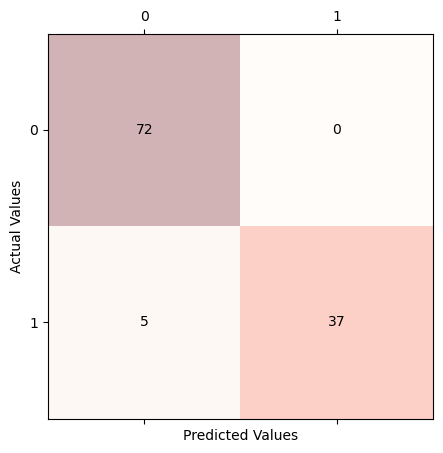

In [63]:
clf4 = make_pipeline(SelectKBest(f_regression, k=10),KNeighborsClassifier(n_neighbors=7))
y_pred = clf4.fit(X_train, y_train).predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Classification Report')
print(classification_report(y_test, y_pred))

print('-'*100)

print('Confusion Matrix')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

#### Importance of optimizing a classifier

Three key parameters can be tuned for the KNN algorithm:
* the value of n_neighbors (how many neighbors to consider for classification) 
* the type of weight (uniform/distance)
* and metric (minkowski/euclidean/manhattan)

The default for KNN is to use <code>n_neighbors=5</code>, weight as <code>default = uniform</code> and metric as <code>default=minkowski</code>. Like with KNN, we will perform a grid search using 5-fold cross validation with a standardized copy of the training dataset. 

Python scikit-learn provides two simple methods for algorithm parameter tuning:
 * Grid Search Parameter Tuning. 
 * Random Search Parameter Tuning.

In [119]:
# Train classifiers.
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [120]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [121]:
# find the best score
g_res.best_score_

0.9758241758241759

In [122]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [123]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance', metric = 'manhattan', algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [124]:
# get a prediction
#y_hat = knn.predict(X_train)
y_pred_gs = knn.predict(X_test)

print('The accuracy of this classifier is: {}'.format(accuracy_score(y_test, y_pred_gs)))

The accuracy of this classifier is: 0.9473684210526315


Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

----------------------------------------------------------------------------------------------------
Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

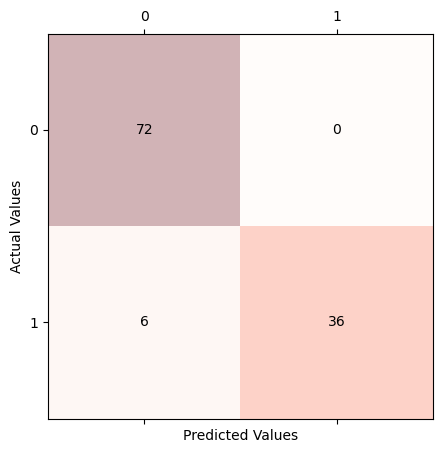

In [125]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_gs)

print('Classification Report')
print(classification_report(y_test, y_pred))

print('-'*100)

print('Confusion Matrix')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

## Conclusion

This work demonstrates the modelling of breast cancer as classification task using K-Nearest Neighbors Algorithm. 

The KNN performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.